In [1]:
import numpy as np
from Req import Hamiltonian, held_karp, gen_ran
from ant_colony.ant_colony import ant_colony
from time import time
from Req.req import Map
import matplotlib.pyplot as plt

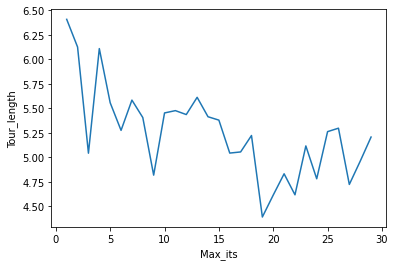

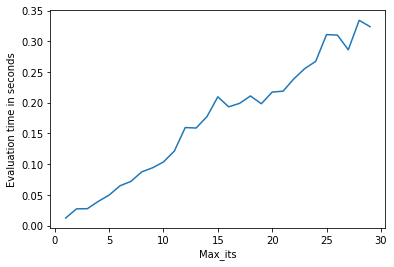

In [8]:
map1 = gen_ran(15)
times = []
tour_length = []
for i in range(1, 30):
    t0 = time()
    sol = ant_colony(map1, 0, 0, 20, 1, 1, i)
    t1 = time()
    times.append(t1 - t0)
    tour_length.append(sol.cost())

#print(held_karp(map1).cost())
plt.plot([i for i in range(1, 30)], tour_length)
plt.xlabel("Max_its")
plt.ylabel("Tour_length")
plt.show()
plt.plot([i for i in range(1, 30)], times)
plt.xlabel("Max_its")
plt.ylabel("Evaluation time in seconds")
plt.show()

